# Projeto de filtros discretos

## 1. Projeto de filtros IIR

### 1.1 Projetos de filtros discretos a partir de filtros contínuos

#### 1.1.1 Método da invariância da resposta ao impulso

Frequência de banda passante normalizada:  0.3125
Frequência de banda de rejeição normalizada:  0.375
Frequência de banda passante do filtro prototipo:  5000.0
Frequência de banda de rejeição do filtro normalizado:  6000.0


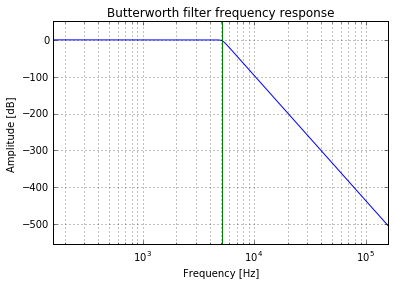

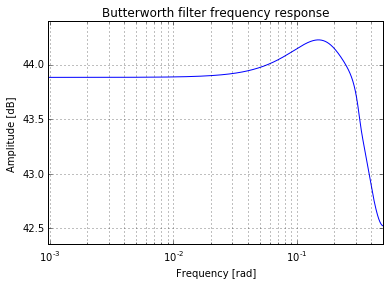

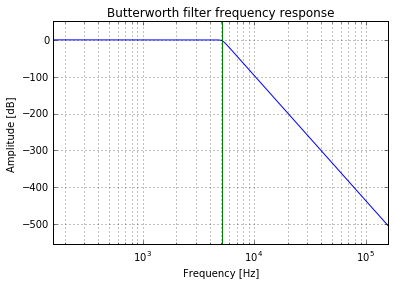

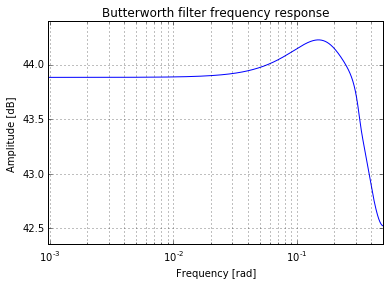

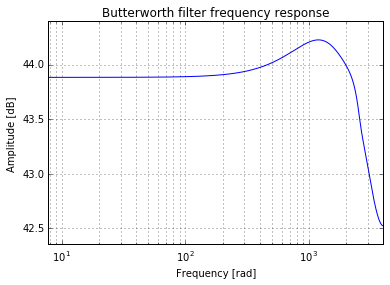

In [35]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Especificações de filtro continuo
deltaP1 = 1    #dB
deltaP2 = 1    #dB
deltaS = 20   #dB
fp = 2.5e3     #Hz (frequencia da banda de passagem)
fs = 3e3       #Hz (frequencia da banda de rejeição)
Fs = 8e3       #Hz (frequencia de amostragem)

# Cálculo das especificações do filtro discreto
fpn = fp/Fs
fsn = fs/Fs

print('Frequência de banda passante normalizada: ', fpn)
print('Frequência de banda de rejeição normalizada: ', fsn)

# Cálculo das especificações do filtro protótipo contínuo
Fd = 16e3  # Hz
fpp = fpn * Fd
fsp = fsn * Fd

print('Frequência de banda passante do filtro prototipo: ', fpp)
print('Frequência de banda de rejeição do filtro normalizado: ', fsp)

# Projeto do filtro protótipo
# Butterworth
ordem, natFreq = sig.buttord(2*np.pi*fpp, 2*np.pi*fsp, deltaP2, deltaS, analog=True)
b, a = sig.butter(ordem, natFreq, 'low', analog=True)

r,p,k = sig.residue(b,a)

rd = r/Fd         # residuos discreto
pd = np.exp(p/Fd) # polos discretos

bz, az = sig.invresz(rd,pd,k) # obtenção da da função de transferência discreta

#print(r,p,k)

w, h = sig.freqs(b, a)
plt.semilogx(w/(2*np.pi), 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(natFreq/(2*np.pi), color='green') # cutoff frequency

wz, hz = sig.freqz(bz, az)
plt.figure()
plt.semilogx(wz/(2*np.pi), 20 * np.log10(abs(hz)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [rad]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
#plt.axvline(natFreq/(2*np.pi), color='green') # cutoff frequency

wz, hz = sig.freqz(bz, az)
plt.figure()
plt.semilogx(wz/(2*np.pi)*Fs, 20 * np.log10(abs(hz)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [rad]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
#plt.axvline(natFreq/(2*np.pi), color='green') # cutoff frequency

plt.show()


## 2. Projetos de filtros FIR